## Importing Libraries

In [1]:
import numpy as np
import pandas as pd

## Importing Dataset

In [4]:
df = pd.read_csv("E:\\Alfido intern\\traffic.csv")

## Explore the dataset

In [5]:
df.head()

,event,date,country,city,artist,album,track,isrc,linkid
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
1,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
2,click,2021-08-21,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2
3,click,2021-08-21,France,Unknown,"Simone & Simaria, Sebastian Yatra",No Llores Más,No Llores Más,BRUM72003904,35573248-4e49-47c7-af80-08a960fa74cd
4,click,2021-08-21,Maldives,Malé,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8


In [7]:
df.shape

(226278, 9)

In [8]:
df.columns

Index(['event', 'date', 'country', 'city', 'artist', 'album', 'track', 'isrc',
       'linkid'],
      dtype='object')

## Data PreProcessing 

In [9]:
df['event'].unique()

array(['click', 'preview', 'pageview'], dtype=object)

In [10]:
df.dtypes

event      object
date       object
country    object
city       object
artist     object
album      object
track      object
isrc       object
linkid     object
dtype: object

In [11]:
df['date']=pd.to_datetime(df['date'])

In [12]:
df=df.drop_duplicates()

In [13]:
y = df['event'].value_counts()
y

event
pageview    73360
click       32499
preview     16708
Name: count, dtype: int64

In [14]:
df[df["event"] == "pageview"].shape[0]

73360

## Data Analysis

In [15]:
Event_sort_date = df[df['event']=='pageview'].groupby('date')['event'].count().sort_values(ascending=False)
Event_sort_date

date
2021-08-19    13006
2021-08-20    11088
2021-08-22     9982
2021-08-21     9939
2021-08-25     9918
2021-08-23     9722
2021-08-24     9705
Name: event, dtype: int64

In [16]:
recorded_events = set(df["event"].unique())
recorded_events.remove("pageview")
recorded_events

{'click', 'preview'}

In [17]:
for recorded_event in recorded_events:
    total_events = df[df["event"] == recorded_event].shape[0]
    print("Total number of", recorded_event, "events is", total_events, "\n")
    data_set = df[df["event"] == recorded_event].groupby(by="date")["event"].count()
    print(recorded_event, "event distribution per day:\n")
    print(data_set, "\n")

Total number of click events is 32499 

click event distribution per day:

date
2021-08-19    5860
2021-08-20    4999
2021-08-21    4279
2021-08-22    4421
2021-08-23    4314
2021-08-24    4231
2021-08-25    4395
Name: event, dtype: int64 

Total number of preview events is 16708 

preview event distribution per day:

date
2021-08-19    2290
2021-08-20    2449
2021-08-21    2483
2021-08-22    2524
2021-08-23    2379
2021-08-24    2355
2021-08-25    2228
Name: event, dtype: int64 



In [19]:
Countries= pd.DataFrame(data = df[df['event']=='pageview'].groupby('country')['event'].count().sort_values(ascending= False))
Countries.head(10)

,event
country,
United States,18131
India,10565
France,6181
Saudi Arabia,3712
United Kingdom,3218
Germany,2585
Canada,1702
Turkey,1598
Pakistan,1382


In [20]:
link_clicks = df[df["event"] == "click"].groupby(by="linkid")["event"].count().reset_index()
link_clicks = link_clicks.rename(columns={
    "event": "clicks" 
})
pageviews = df[df["event"] == "pageview"].groupby(by="linkid")["event"].count().reset_index()
pageviews = pageviews.rename(columns={
    "event": "pageviews"
})

In [21]:
link_clicks.head()

,linkid,clicks
0,00126b32-0c35-507b-981c-02c80d2aa8e7,2
1,004b9724-abca-5481-b6e9-6148a7ca00a5,1
2,0063a982-41cd-5629-96d0-e1c4dd72ea11,2
3,006af6a0-1f0d-4b0c-93bf-756af9071c06,6
4,00759b81-3f04-4a61-b934-f8fb3185f4a0,3


In [22]:
pageviews.head()

,linkid,pageviews
0,00073307-ae96-5089-a117-4783afb42f8e,2
1,00126b32-0c35-507b-981c-02c80d2aa8e7,2
2,0018cfff-50a1-5984-9715-01ef2d11a49a,1
3,0033934b-5d16-5a06-af58-d087bcdd3680,1
4,0034d6cf-3bd8-5ffe-aafc-b3959fc48608,1


In [23]:
df_q4 = pd.merge(left=link_clicks, right=pageviews, on="linkid", how="inner")

In [24]:
df_q4["click_rate"] = df_q4["clicks"] / df_q4["pageviews"]

In [25]:
df_q4

,linkid,clicks,pageviews,click_rate
0,00126b32-0c35-507b-981c-02c80d2aa8e7,2,2,1.000000
1,004b9724-abca-5481-b6e9-6148a7ca00a5,1,1,1.000000
2,0063a982-41cd-5629-96d0-e1c4dd72ea11,2,3,0.666667
3,006af6a0-1f0d-4b0c-93bf-756af9071c06,6,26,0.230769
4,00759b81-3f04-4a61-b934-f8fb3185f4a0,3,3,1.000000
...,...,...,...,...
2248,ffd8d5a7-91bc-48e1-a692-c26fca8a8ead,25,67,0.373134
2249,fff38ca0-8043-50cd-a5f1-f65ebb7105c5,1,1,1.000000
2250,fff84c0e-90a1-59d8-9997-adc909d50e16,1,1,1.000000
2251,fffc17a7-f935-5d3e-bd3e-d761fd80d479,1,2,0.500000


In [26]:
df_q4['click_rate'].describe()

count    2253.000000
mean        0.796403
std         0.940052
min         0.100000
25%         0.500000
50%         1.000000
75%         1.000000
max        43.333333
Name: click_rate, dtype: float64

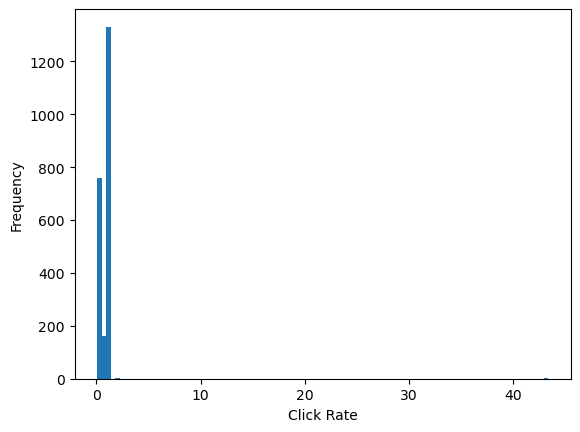

In [27]:
ax = df_q4['click_rate'].plot(kind='hist',bins=100)
we = ax.set_xlabel('Click Rate')

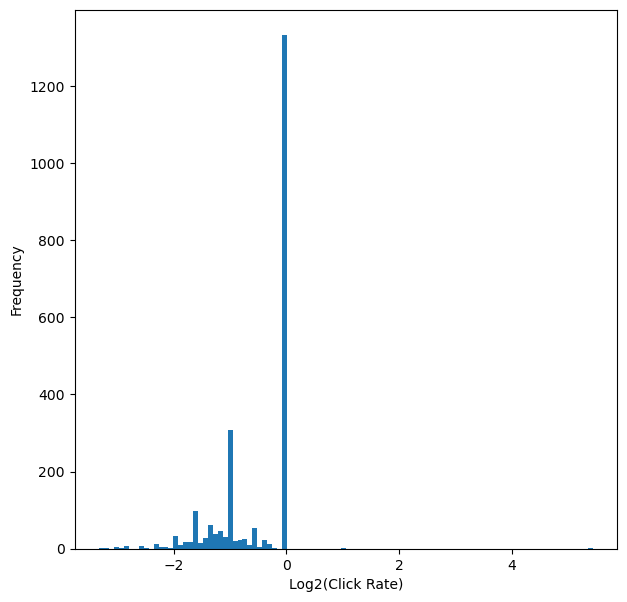

In [28]:
df_q4["click_rate_log2"] = np.log2(df_q4["click_rate"])
ax = df_q4["click_rate_log2"].plot(kind="hist", figsize=(7, 7), bins=100)
_ = ax.set_xlabel("Log2(Click Rate)")

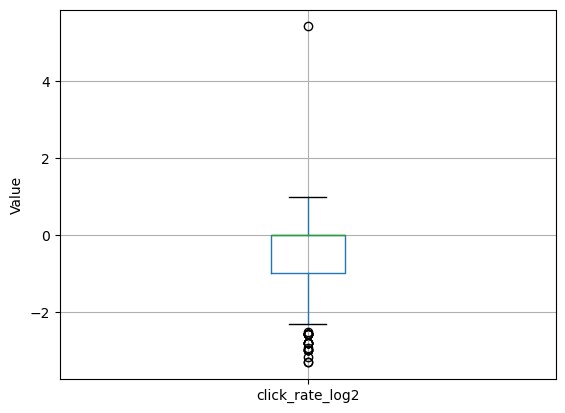

In [29]:
ax = df_q4.boxplot(column="click_rate_log2")
_ = ax.set_ylabel("Value")

In [30]:
df_q6 = df[df["event"].isin(["click", "preview"])]

In [31]:
df_q6.describe(include='all')

,event,date,country,city,artist,album,track,isrc,linkid
count,49207,49207,49205,49205,49198,49206,49206,47246,49207
unique,2,NaN,206,8137,1549,2003,2155,628,2286
top,click,NaN,United States,Unknown,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
freq,32499,NaN,10533,3749,3712,3712,3712,3712,3712
mean,NaN,2021-08-21 20:53:28.226472192,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,2021-08-19 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2021-08-20 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,2021-08-22 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,2021-08-24 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,2021-08-25 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
link_clicks = df[df["event"] == "click"].groupby(by="linkid")["event"].count().reset_index()
link_clicks = link_clicks.rename(columns={
    "event": "clicks" 
})
previews = df[df["event"] == "preview"].groupby(by="linkid")["event"].count().reset_index()
previews = previews.rename(columns={
    "event": "previews"
})

In [33]:
df_q6 = pd.merge(left=df_q6, right=link_clicks, how="left", on="linkid")
df_q6 = pd.merge(left=df_q6, right=previews, how="left", on="linkid")
df_q6.dropna(subset=["clicks", "previews"], inplace=True)
df_q6

,event,date,country,city,artist,album,track,isrc,linkid,clicks,previews
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8,2266.0,1446.0
1,click,2021-08-21,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2,684.0,432.0
2,click,2021-08-21,France,Unknown,"Simone & Simaria, Sebastian Yatra",No Llores Más,No Llores Más,BRUM72003904,35573248-4e49-47c7-af80-08a960fa74cd,46.0,26.0
3,click,2021-08-21,Maldives,Malé,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8,2266.0,1446.0
4,click,2021-08-21,United States,Los Angeles,KenTheMan,I'm Perfect,I'm Perfect,US39N2102090,190c7170-4044-4c97-9709-926917155b02,523.0,331.0
...,...,...,...,...,...,...,...,...,...,...,...
49202,preview,2021-08-23,Myanmar,Yangon,Justin Bieber,Justice,Peaches,USUM72102636,6add5818-33b1-4ab1-977d-435af50e9b10,116.0,80.0
49203,preview,2021-08-23,United States,Brentwood,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8,2266.0,1446.0
49204,preview,2021-08-23,Ukraine,Kyiv,Miscél,when you left,when you left,QM42K1907890,2fc15e8b-83aa-40ee-9f9d-5d96c6d4356c,125.0,82.0
49205,preview,2021-08-23,Saudi Arabia,Khamis Mushait,Anne-Marie,Beautiful,Beautiful,GBAHS2100225,522da5cc-8177-4140-97a7-a84fdb4caf1c,891.0,753.0


In [34]:
cols= ['clicks','previews']
x = df_q6[cols]
y = df_q6['clicks']
x.corr()

,clicks,previews
clicks,1.000000,0.984054
previews,0.984054,1.000000


In [35]:
from scipy import stats
stats.pearsonr(x=df_q6["clicks"], y=df_q6["previews"])

PearsonRResult(statistic=0.9840541182271481, pvalue=0.0)

In [36]:
categorical_columns = [
    "country",
    "city",
    "artist",
    "album",
    "track"
]
factorized_df = df_q6[categorical_columns] \
                     .apply(lambda x: pd.factorize(x)[0]) \
                     .corr()
factorized_df

,country,city,artist,album,track
country,1.000000,0.110448,-0.057606,-0.054248,-0.054016
city,0.110448,1.000000,0.000978,0.003972,0.006747
artist,-0.057606,0.000978,1.000000,0.934663,0.939540
album,-0.054248,0.003972,0.934663,1.000000,0.973713
track,-0.054016,0.006747,0.939540,0.973713,1.000000
